In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def convertOtofloat(df, column_name):
    if str(df[column_name].dtype) == 'object':
        try:
            df[column_name] = df[column_name].astype(float)
        except ValueError:
                
            for j in range(len(df[column_name])):
                if len(df[column_name]) == 0:
                    df[column_name][j] = np.nan
                else:
                    df[column_name] = df[column_name][j]
    return df

def find_RMSE(exp_time, t_steps, cylinder_T, T_c):
    residual = []
    for i in range(len(exp_time)):
        if np.round(1 % (t_steps[1]-t_steps[0]),decimals=5) != 0:
            time = exp_time[i]
            idx = np.where(np.abs(t_steps - time) == np.min(np.abs(t_steps - time)))
            error = (cylinder_T[i] - T_c[idx])**2
            residual = np.append(residual,error)
        else:
            time = exp_time[i]
            idx = np.where(t_steps == time)
            error = (cylinder_T[i] - T_c[idx])**2
            residual = np.append(residual,error)
    RMSE = np.sqrt(sum(residual)/len(residual))
    return(RMSE)


In [4]:
def h_analytical_solve(Data = 'Natural Convection.csv',start_off = 0,end_off = 0):
    def fit_exp_linear(t, y, C=0):
        y = y - C
        y = np.log(y)
        K, A_log = np.polyfit(t, y, 1)
        A = np.exp(A_log)
        return A, K

    FC2_file = Data
    raw_data_FC2 = pd.read_csv(FC2_file,header=6)
    raw_array_FC2 = np.array(raw_data_FC2)

    end = raw_array_FC2.shape[0] - end_off

    exp_time = raw_array_FC2[start_off:end,0].astype(float)
    exp_time = exp_time*5 - 1
    cylinder_T = raw_array_FC2[start_off:end,2].astype(float)
    ambient_T = raw_array_FC2[start_off:end,3]
    
    T_initial = cylinder_T.max() 
    T_ambient = np.mean(ambient_T)
    time = exp_time.max() 
    
    
    new_T_cyl = (cylinder_T - T_ambient)/(T_initial - T_ambient)
    plt.plot(exp_time,np.log(new_T_cyl))
    A, k = fit_exp_linear(exp_time,new_T_cyl)
    
    time_range = np.arange(0,time,0.1)
    plt.plot(time_range,k*time_range)
    plt.plot(exp_time,np.log(new_T_cyl))
    plt.title("Non Dimensional Temperature vs Time")
    plt.ylabel("Non Dimensional Temperature")
    plt.xlabel("Time")

    radius = 0.025/2
    height = 0.06018

    rho = 2770
    Volume = np.pi * radius**2 * height
    Cp = 896 
    tau = -1/k
    As = 2*np.pi*radius*height

    h = (rho*Volume*Cp)/(tau*As)
    print("Optimal h value:",h)

Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!
Bad things will happen!


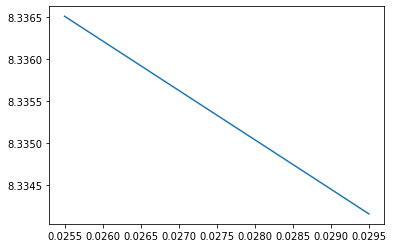

In [5]:
k = 167 
density = 2770 
Cp = 896 
    
alfa = k/(density*Cp)

radius = 0.025/2
height = 0.06018
    
A_s = 2*np.pi*radius*height
volume = np.pi * radius**2 * height
mass = density * volume
    
FC2_file = 'Natural Convection.csv'
raw_data_FC2 = pd.read_csv(FC2_file,header=6)
raw_array_FC2 = np.array(raw_data_FC2)
    
exp_time = raw_array_FC2[:,0]*5 - 1
cylinder_T = raw_array_FC2[:,2]
ambient_T = raw_array_FC2[:,3]
    
    
time = exp_time.max() 
ic = cylinder_T.max() 
    
T_ambient = np.mean(ambient_T)
    
dr = np.arange(0.001,0.004,0.0005)
dt = np.arange(.025,0.035,0.0005)
    
h = 30
    
stability_mat = np.zeros(((len(dr)-1)*(len(dt)-1),3))
    
for r in range(1,len(dr)):
    r_idx = (r-1)*len(dt[1:])
    for t in range(1,len(dt)):
        idx = r_idx + t - 1
        stability_mat[idx,0] = dr[r]
        stability_mat[idx,1] = dt[t]
        s = alfa * dt[t]/dr[r]**2
        stability_mat[idx,2] = s
        if (s>0.5):
            print('Bad things will happen!')
    
all_RMSE = []           
for dr_val in dr[1:]:
    for dt_val in dt[1:]:
    
        x_steps = np.arange(0 ,radius + dr_val ,step = dr_val)
        t_steps = np.arange(0 ,time + dt_val ,step = dt_val )
            
        n_x = len(x_steps)
        n_t = len(t_steps)
    
    
        T = np.zeros((n_t,n_x))
        T[0] = ic
            
        for m in range(1,n_t):
            for i in range(1,n_x-1):
               a_i = s - s/(2*i)
               b_i = 1 - 2*s
               c_i = s + s/(2*i)
            
               T[m,i] = a_i * T[m-1,i-1] + b_i * T[m-1,i] + c_i * T[m-1,i+1]
            
               T[m,0] = T[m,1]
            
               H = -h * A_s *dt_val/(mass*Cp)
               T[m,-1] = H*(T[m-1,-1] - T_ambient) + T[m-1,-1]
        RMSE_temp = find_RMSE(exp_time, t_steps, cylinder_T, T[:,0])
        all_RMSE = np.append(all_RMSE,RMSE_temp)       
df_SR = pd.DataFrame(stability_mat, columns = ['dr','dt','s'])
df_SR['RMSE'] = all_RMSE
df_SR = convertOtofloat(df_SR, 'RMSE')
df_SR['RMSE'] = df_SR['RMSE'].astype(float)
df_SR5 = df_SR[df_SR['s']<0.5]
    
opt = df_SR5.loc[(df_SR5['RMSE'] == df_SR5['RMSE'].min())] 
dr_opt = np.array(opt['dr'])
dt_opt = np.array(opt['dt'])
S_opt = np.array(opt['s'])
RMSE_opt = np.array(opt['RMSE'])
    
dtf = df_SR5.loc[(df_SR5['dr'] == dr_opt[0])]
    
dtf = dtf.dropna()
    
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dtf['dt'],dtf['RMSE'])

In [6]:
print("Optimal dr value:",dr_opt)
print("Optimal dt value:",dt_opt)

Optimal dr value: [0.002]
Optimal dt value: [0.0295]


Optimal h value: 12.316525945573712


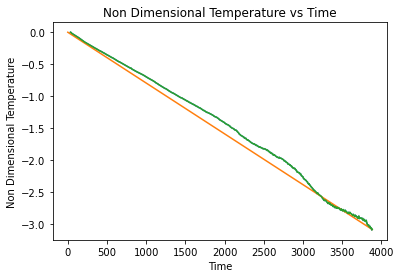

In [7]:
h_analytical_solve(Data = 'Natural Convection.csv',start_off = 0,end_off = 250)

Optimal h value: 37.3624000449915


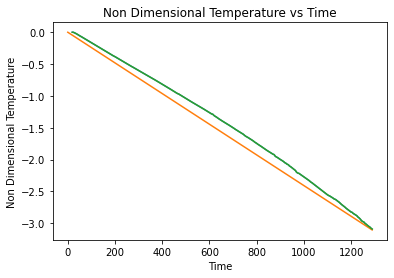

In [8]:
h_analytical_solve(Data = 'V 1ms.csv',start_off = 0,end_off = 100)

Optimal h value: 42.12058944475348


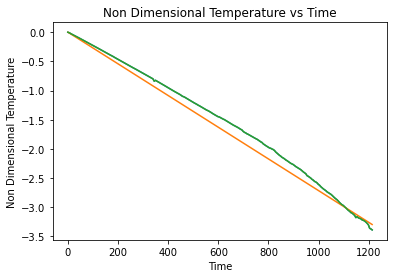

In [9]:
h_analytical_solve(Data = 'V 2ms.csv',start_off = 0,end_off = 100)

In [8]:
#Emperical Calc nu = h D / k , h = k(C * Re ^ m * Pr ^ 1/3) / D
mu = 1.82e-5
k = .0167
Pr = 0.71 ** (1/3)
density = 1.19
L = .0125
D = .0025
vel_1 = 1
vel_2 = 2
def Re(vel,rho,D,mu):
    Re = vel * rho * D / mu
    return Re
Re = Re(vel_1,density,D,mu)

if 0.4 < Re < 4:
    C = .898
    m = .330
elif 4<Re<40:
    C = .911
    m = .385
elif 40<Re<4000:
    C = .683
    m = .466
elif 4000<Re<40000:
    C = .193
    m = .618
elif 40000<Re<400000: 
    C = .027
    m = .805
else:
    print("big error yo")
    
def nu(Re,Pr,m,C):
    nu = (Re**m) * C * Pr
    return nu
nu=nu(Re,Pr,m,C)

def h(k,D,nu):
    h = nu * k / D
    return h
h(k,D,nu)

43.759089497072736

In [20]:
#Emperical Calc nu = h D / k , h = k(C * Re ^ m * Pr ^ 1/3) / D
mu = 1.82e-5
Pr = 0.71 ** (1/3)
density = 1.19
L = .0125
D = .0025
k=.0167
vel_1 = 1
vel_2 = 2
def Re(vel,rho,D,mu):
    Re = vel * rho * D / mu
    return Re
Re = Re(vel_2,density,D,mu)

if 0.4 < Re < 4:
    C = .898
    m = .330
elif 4<Re<40:
    C = .911
    m = .385
elif 40<Re<4000:
    C = .683
    m = .466
elif 4000<Re<40000:
    C = .193
    m = .618
elif 40000<Re<400000: 
    C = .027
    m = .805
else:
    print("big error yo")
    
def nu(Re,Pr,m,C):
    nu = (Re**m) * C * Pr
    return nu
nu=nu(Re,Pr,m,C)

def h(k,D,nu):
    h = nu * k / D
    return h
h(k,D,nu)

28.9119219634679


In [6]:
#total heat transfered q = h(Ti-Tinf)
Tinf = 23
Ti_nc = 65
Ti_fc1 = 75
Ti_fc2 = Ti_nc
h_nc = 12.316525945573712
h_fc1 = 28.9119219634679
h_fc2 = 43.759089497072736
q_nc = h_nc*(Ti_nc - Tinf)
q_fc1 = h_fc1*(Ti_fc1 - Tinf)
q_fc2 = h_fc2*(Ti_fc2 - Tinf)
print("Total Heat Transfered =",q_nc+ q_fc1+q_fc2,"Watts")

Total Heat Transfered = 3858.595790691482 Watts
